__Ejercicio 1:__ ¿Como podemos evaluar funciones en matrices?
__Hint:__ ¿que operaciones sabemos que estan bien definidas sobre matrices?

Las podemos evaluar utilizando el polinomio de Taylor.

-----------------------------------------------------------------------------------

__Ejercicio 2:__ ¿Como se define una matriz simétrica?

Una matriz simétrica debe ser una matriz cuadrada la cual cumpla que dicha matriz sea igual a la matriz transpuesta.  

Por ejemplo:

In [9]:
A=[3 1 7;1 2 5;7 5 0]

3×3 Array{Int64,2}:
 3  1  7
 1  2  5
 7  5  0

In [11]:
A' #La notación para calcular la transpuesta es A' 

3×3 Array{Int64,2}:
 3  1  7
 1  2  5
 7  5  0

In [13]:
A==A' #Observamos que son iguales. Por lo tanto es una matriz simétrica.

true

_________________________________

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Sea A una matriz cuadrada cualquiera y A' la tranpuesta de A entonces se puede construir una matriz simétrica de la siguiente forma:
$$A_{sim}=\frac{1}{2}(A+A')$$

Por ejemplo:

In [15]:
A=[1 2 3;2 3 4;6 1 2] #La matriz a es una matriz cuadrada no simétrica.

3×3 Array{Int64,2}:
 1  2  3
 2  3  4
 6  1  2

In [7]:
A' #A' es la transpuesta de A.

3×3 Array{Int64,2}:
 1  2  6
 2  3  1
 3  4  2

In [8]:
Asim=(1/2)*(A+A') #Al aplicar la fórmula obtenemos una matriz simétrica. Se observa claramente ya que Asim=Asim'

3×3 Array{Float64,2}:
 1.0  2.0  4.5
 2.0  3.0  2.5
 4.5  2.5  2.0

In [14]:
Asim==Asim'

true

----------------------------------

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.

In [2]:
A=[-1 1;-1 -1];

In [3]:
v=eigvals(A) #valores propios

2-element Array{Complex{Float64},1}:
 -1.0+1.0im
 -1.0-1.0im

In [12]:
w=eigvecs(A)#vectores propios

2×2 Array{Complex{Float64},2}:
 0.707107+0.0im       0.707107-0.0im     
      0.0+0.707107im       0.0-0.707107im

In [15]:
i=inv(w)

2×2 Array{Complex{Float64},2}:
 0.707107-0.0im  -0.0-0.707107im
 0.707107+0.0im   0.0+0.707107im

In [52]:
function xdet(x0,N) #hago una función que va a depender de la condición inicial y N 
    t=linspace(0,10,N) #el rango de t es de 0 a 10 en N pasos
    listk=[] #hago una lista para guardar los resultados
for i in 1:N
    k=w*diagm(exp.(v*t[i]))*i*x0 # "k" es x(t) pero escogí esa notación
    push!(listk,k) 
    end
real(listk) #pido que me imprima únicamente la parte real
end

xdet (generic function with 1 method)

In [61]:
a=xdet([0,1],1000)

1000-element Array{Array{Float64,1},1}:
 [0.707107,0.0]        
 [1.40006,-0.0140151]  
 [2.07886,-0.0416243]  
 [2.74351,-0.0824126]  
 [3.39405,-0.13597]    
 [4.03047,-0.201894]   
 [4.65281,-0.279785]   
 [5.2611,-0.36925]     
 [5.85538,-0.469904]   
 [6.43568,-0.581365]   
 [7.00205,-0.703257]   
 [7.55454,-0.835209]   
 [8.0932,-0.976859]    
 ⋮                     
 [-0.0316799,0.015898] 
 [-0.0312367,0.016069] 
 [-0.0307959,0.0162341]
 [-0.0303574,0.0163933]
 [-0.0299212,0.0165467]
 [-0.0294874,0.0166944]
 [-0.029056,0.0168365] 
 [-0.028627,0.0169729] 
 [-0.0282005,0.0171039]
 [-0.0277766,0.0172294]
 [-0.0273552,0.0173496]
 [-0.0269364,0.0174645]

In [62]:
x=map(x->real(x[1]),a)#extraigo x de a

1000-element Array{Float64,1}:
  0.707107 
  1.40006  
  2.07886  
  2.74351  
  3.39405  
  4.03047  
  4.65281  
  5.2611   
  5.85538  
  6.43568  
  7.00205  
  7.55454  
  8.0932   
  ⋮        
 -0.0316799
 -0.0312367
 -0.0307959
 -0.0303574
 -0.0299212
 -0.0294874
 -0.029056 
 -0.028627 
 -0.0282005
 -0.0277766
 -0.0273552
 -0.0269364

In [63]:
y=map(x->real(x[2]),a)#extraigo y de a

1000-element Array{Float64,1}:
  0.0      
 -0.0140151
 -0.0416243
 -0.0824126
 -0.13597  
 -0.201894 
 -0.279785 
 -0.36925  
 -0.469904 
 -0.581365 
 -0.703257 
 -0.835209 
 -0.976859 
  ⋮        
  0.015898 
  0.016069 
  0.0162341
  0.0163933
  0.0165467
  0.0166944
  0.0168365
  0.0169729
  0.0171039
  0.0172294
  0.0173496
  0.0174645

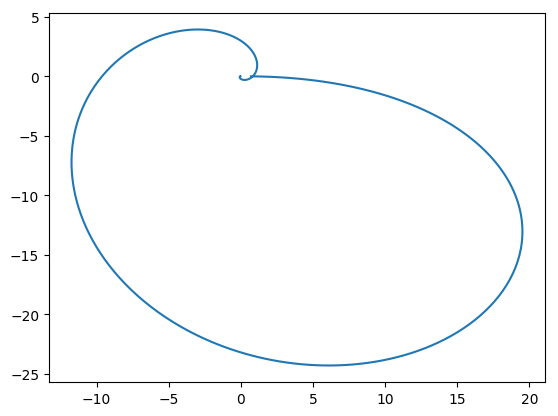

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb2abb50d50>

In [64]:
using PyPlot
plot(x,y)